<a href="https://colab.research.google.com/github/jigneshraiyani/DeepLearning/blob/main/BGD_SGD_Mini_batch_GD_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import time

In [14]:
dataset = pd.read_csv('/content/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
df = dataset.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [16]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [18]:
x_scaled.shape

(400, 2)

In [19]:
# Building Deep Learning Module

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential

In [20]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=2))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                30        
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Batch Gradiant Decent
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()
history = model.fit(x_scaled, y, validation_split=.2, epochs=100, verbose=0, batch_size=400)
print(time.time()-start)

4.651465177536011


In [22]:
model1 = Sequential()
model1.add(Dense(10, activation='relu', input_dim=2))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                30        
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [23]:
# SGD
model1.compile(loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()
history1 = model1.fit(x_scaled, y, validation_split=.2, epochs=100, verbose=0, batch_size=1)
print(time.time()-start)

142.51577854156494


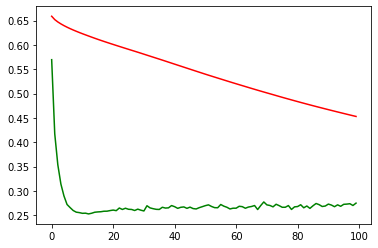

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color='red')
plt.plot(history1.history['loss'], color='green')

In [25]:
# Mini-Batch SGD
model2 = Sequential()
model2.add(Dense(10, activation='relu', input_dim=2))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                30        
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Mini-batch
model2.compile(loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()
history2 = model2.fit(x_scaled, y, validation_split=.2, epochs=100, verbose=0, batch_size=32)
print(time.time()-start)

10.874985933303833


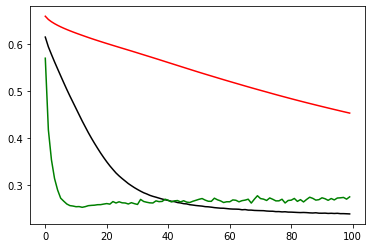

In [27]:
plt.plot(history2.history['loss'], color='black') # mini-batch
plt.plot(history.history['loss'], color='red') # bgd
plt.plot(history1.history['loss'], color='green') # sgd